# **The Real Deal Behind the Artificial Appeal: Inferential Utility of Tabular Synthetic Data**

**(c) SYNDARA**

Results of the hyperparameter optimization study for CTGAN and TVAE in "The Real Deal Behind the Artificial Appeal: Inferential Utility of Tabular Synthetic Data", presented during the 40th Conference on Uncertainty in Artificial Intelligence.

In [1]:
%load_ext autoreload
%autoreload 2

## Hyperparameter tuning of CTGAN/TVAE with Optuna

Results after running hyperparam_optuna.py

In [2]:
import pandas as pd
import optuna
from optuna import load_study

**Load study**

In [3]:
multiple_seeds = True # use different set of 5 seeds (used for model initialization and train/val split) for each trial and pool results over these seeds
model_class = 'CTGAN' # 'CTGAN' or 'TVAE'
package = 'custom_sdv' # 'synthcity' to use Synthcity, 'custom_sdv' to use SDV (customized), 'tune_package' to set the package chosen as a tunable hyperparameter as well

study_name_elements = [model_class, package, 'study']
if multiple_seeds:
    study_name_elements.append('multiple') # add 'multiple' to study_name if multiple seeds are considered
study_name = '_'.join(study_name_elements) # name of study
study_storage = f'sqlite:///{study_name}.db'
study = load_study(study_name=study_name, storage=study_storage) # load SQLite DB file to access the history of study

**Inspect study**

In [4]:
# Create dataframe from study
study_df = study.trials_dataframe()

In [5]:
# Study duration
max(study_df['datetime_complete']) - min(study_df['datetime_start'])

Timedelta('0 days 12:01:11.424066')

In [6]:
# Top 10 trials
with pd.option_context('display.max_columns', study_df.shape[1]): # replace the number of columns you want to see completely
    display(study_df.sort_values(by=['value'], ascending=False).head(n=10))

,number,value,datetime_start,datetime_complete,duration,params_discriminator_decay,params_discriminator_dropout,params_discriminator_n_layers_hidden,params_discriminator_n_units_hidden,params_discriminator_steps,params_epochs,params_generator_decay,params_generator_dropout,params_generator_lr,params_generator_n_layers_hidden,params_generator_n_units_hidden,user_attrs_discriminator_lr,user_attrs_package,user_attrs_score_mean,user_attrs_score_seed0,user_attrs_score_seed1,user_attrs_score_seed2,user_attrs_score_seed3,user_attrs_score_seed4,user_attrs_score_std,state
227,227,1.015107,2023-09-13 04:55:02.043820,2023-09-13 04:59:48.881940,0 days 00:04:46.838120,0.000810,0.829075,3,128,10,69,0.000153,0.999529,0.000016,3,512,0.000016,custom_sdv,1.015107,1.003252,1.019283,1.010078,1.032350,1.010572,0.010011,COMPLETE
201,201,1.014667,2023-09-13 03:58:45.015735,2023-09-13 04:02:31.580606,0 days 00:03:46.564871,0.000894,0.801179,3,128,10,54,0.000083,0.957995,0.000015,3,512,0.000015,custom_sdv,1.014667,1.032922,0.984871,1.013554,1.000946,1.041041,0.020524,COMPLETE
269,269,1.014443,2023-09-13 06:05:07.188641,2023-09-13 06:09:08.209634,0 days 00:04:01.020993,0.001402,0.384106,3,128,10,58,0.000007,0.888726,0.000017,3,512,0.000017,custom_sdv,1.014443,1.029287,0.979939,1.014389,1.020966,1.027635,0.018041,COMPLETE
102,102,1.013516,2023-09-12 23:15:21.048517,2023-09-12 23:19:23.608988,0 days 00:04:02.560471,0.000923,0.847294,3,128,10,58,0.000001,0.968693,0.000045,3,512,0.000045,custom_sdv,1.013516,1.066852,0.976350,1.007437,0.999612,1.017326,0.029903,COMPLETE
107,107,1.013031,2023-09-12 23:35:09.321316,2023-09-12 23:39:16.261269,0 days 00:04:06.939953,0.001292,0.838853,3,128,10,59,0.000004,0.966269,0.000035,3,512,0.000035,custom_sdv,1.013031,1.019197,1.004685,1.033151,1.008646,0.999476,0.011962,COMPLETE
170,170,1.012540,2023-09-13 02:38:39.860814,2023-09-13 02:42:39.887517,0 days 00:04:00.026703,0.000616,0.823860,3,128,10,57,0.000004,0.887463,0.000023,3,512,0.000023,custom_sdv,1.012540,1.028196,1.019110,1.033757,0.979482,1.002154,0.019693,COMPLETE
197,197,1.010756,2023-09-13 03:47:26.034148,2023-09-13 03:50:32.159811,0 days 00:03:06.125663,0.001001,0.841652,3,128,10,44,0.000211,0.959190,0.000014,3,512,0.000014,custom_sdv,1.010756,1.056636,0.988837,1.003910,1.008448,0.995950,0.023903,COMPLETE
224,224,1.010551,2023-09-13 04:46:46.056867,2023-09-13 04:52:38.507681,0 days 00:05:52.450814,0.000526,0.860372,3,128,10,85,0.000048,0.929662,0.000015,3,512,0.000015,custom_sdv,1.010551,1.021764,0.954786,1.036982,0.999432,1.039792,0.031345,COMPLETE
193,193,1.010542,2023-09-13 03:35:48.638185,2023-09-13 03:40:33.814568,0 days 00:04:45.176383,0.001049,0.821767,3,128,10,68,0.000082,0.982703,0.000016,3,512,0.000016,custom_sdv,1.010542,1.003631,1.004844,1.064044,0.996479,0.983713,0.027786,COMPLETE
108,108,1.010438,2023-09-12 23:39:16.273051,2023-09-12 23:43:27.061848,0 days 00:04:10.788797,0.000808,0.849131,3,128,10,60,0.000002,0.979172,0.000035,3,512,0.000035,custom_sdv,1.010438,1.011701,1.010781,1.037370,1.007184,0.985154,0.016595,COMPLETE


In [7]:
# Best trial
study.best_trial._number

227

In [8]:
study.best_value

1.015106978644163

In [9]:
study.best_params

{'discriminator_decay': 0.0008100556320441468,
 'discriminator_dropout': 0.8290745538742638,
 'discriminator_n_layers_hidden': 3,
 'discriminator_n_units_hidden': 128,
 'discriminator_steps': 10,
 'epochs': 69,
 'generator_decay': 0.0001526129327521476,
 'generator_dropout': 0.999528980376458,
 'generator_lr': 1.5809491409494914e-05,
 'generator_n_layers_hidden': 3,
 'generator_n_units_hidden': 512}

**Plot study**

optuna.visualization uses a (interactive) plotly backend, which is not straightforward to set up in HPC JupyterLab, so use optuna.visualization.matplotlib (though experimental)

In [10]:
from optuna.visualization.matplotlib import plot_contour, plot_edf, plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_slice, plot_timeline, plot_intermediate_values

Study overview

/tmp/ipykernel_1186193/1086785880.py:2: ExperimentalWarning: plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.
  plot_timeline(study).figure.set_size_inches(16, 9)


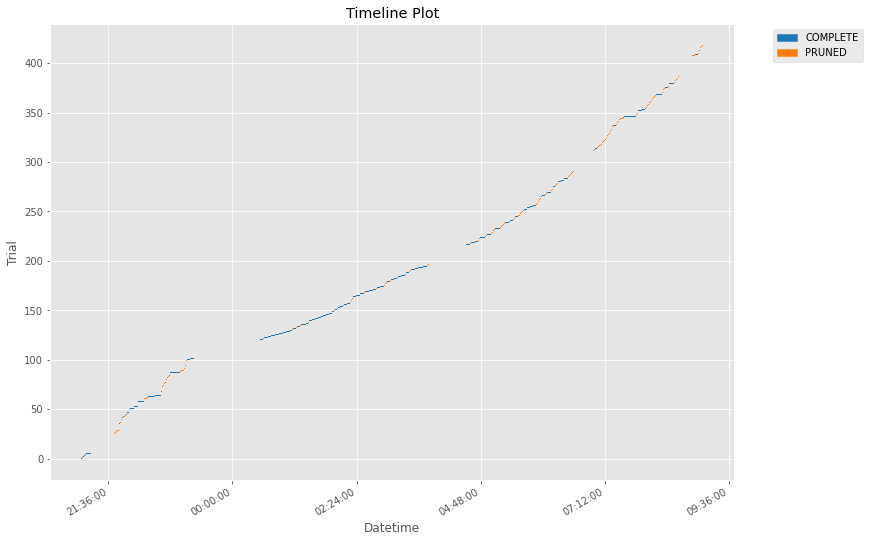

In [22]:
# Optimization time line
plot_timeline(study).figure.set_size_inches(16, 9)

/tmp/ipykernel_1186193/1395444419.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study).figure.set_size_inches(16, 9)


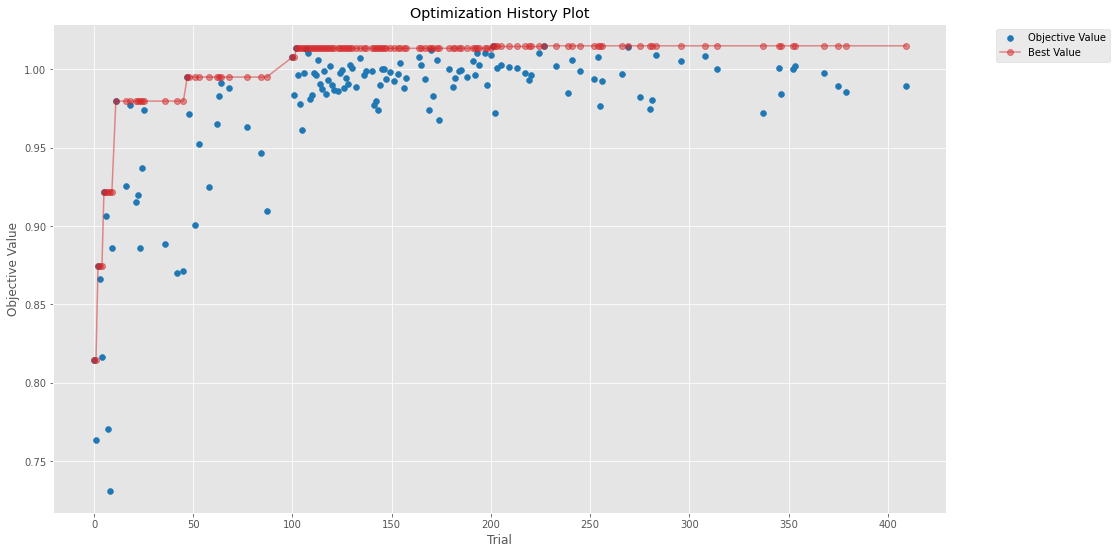

In [23]:
# Optimization history
plot_optimization_history(study).figure.set_size_inches(16, 9)

/tmp/ipykernel_1186193/4037878931.py:2: ExperimentalWarning: plot_edf is experimental (supported from v2.2.0). The interface can change in the future.
  plot_edf(study).figure.set_size_inches(16, 9)


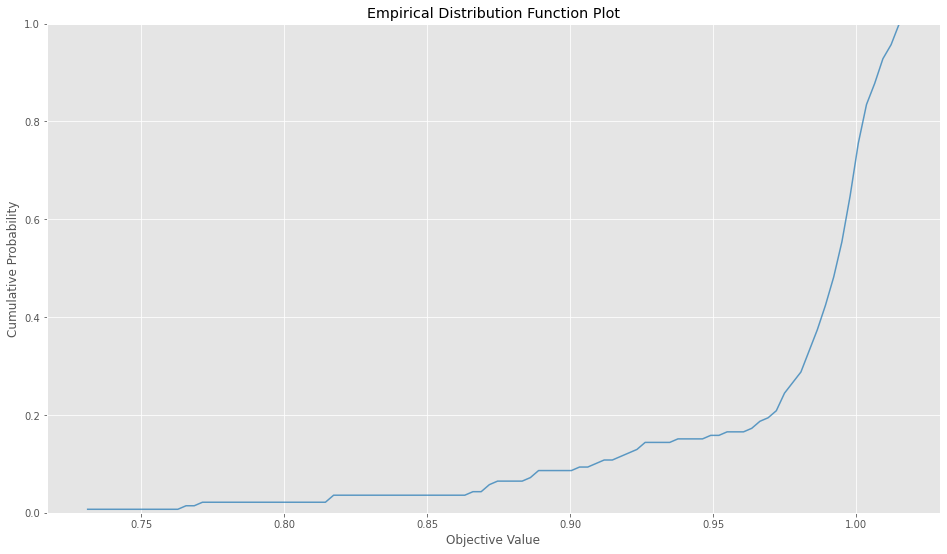

In [24]:
# Visualize empirical distribution function of the objective
plot_edf(study).figure.set_size_inches(16, 9)

/tmp/ipykernel_1186193/4245610067.py:2: ExperimentalWarning: plot_intermediate_values is experimental (supported from v2.2.0). The interface can change in the future.
  fig = plot_intermediate_values(study).figure


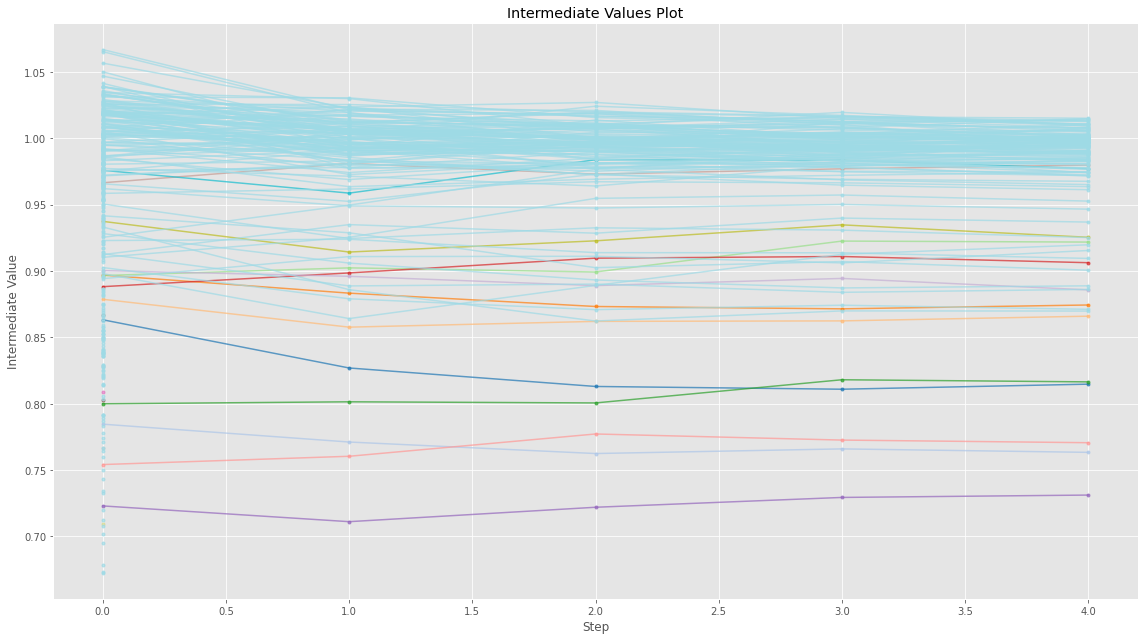

In [25]:
# Plot intermediate values of all trials (when pruning was enabled)
fig = plot_intermediate_values(study).figure
fig.gca().get_legend().remove() # remove legend
fig.set_size_inches(16, 9)

/tmp/ipykernel_1186193/1126308298.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study).figure.set_size_inches(16, 9)


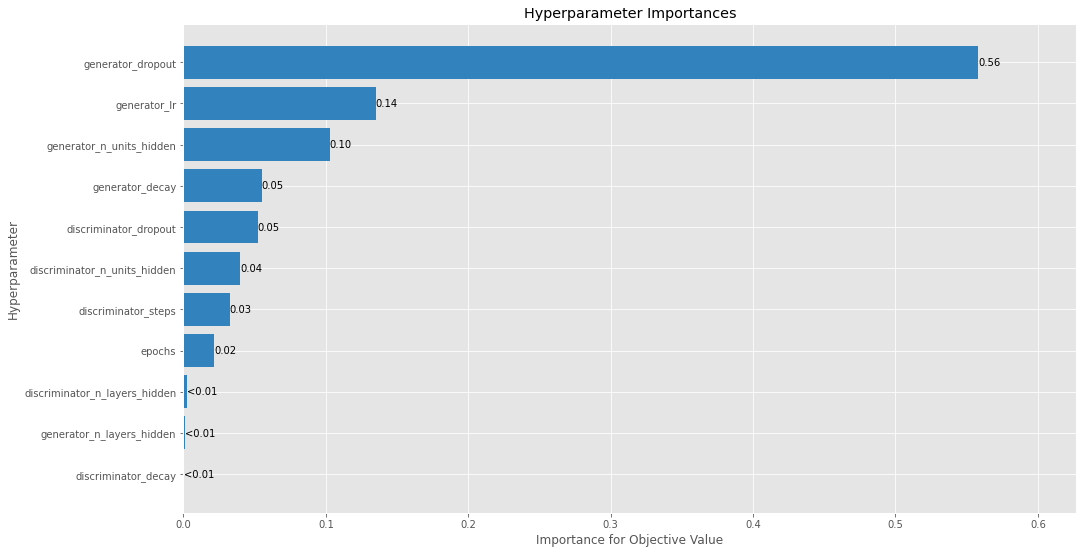

In [26]:
# Visualize hyperparameter importances
plot_param_importances(study).figure.set_size_inches(16, 9)

/tmp/ipykernel_1186193/3358318197.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study, target=lambda t: t.duration.total_seconds(), target_name="duration").figure.set_size_inches(16, 9)


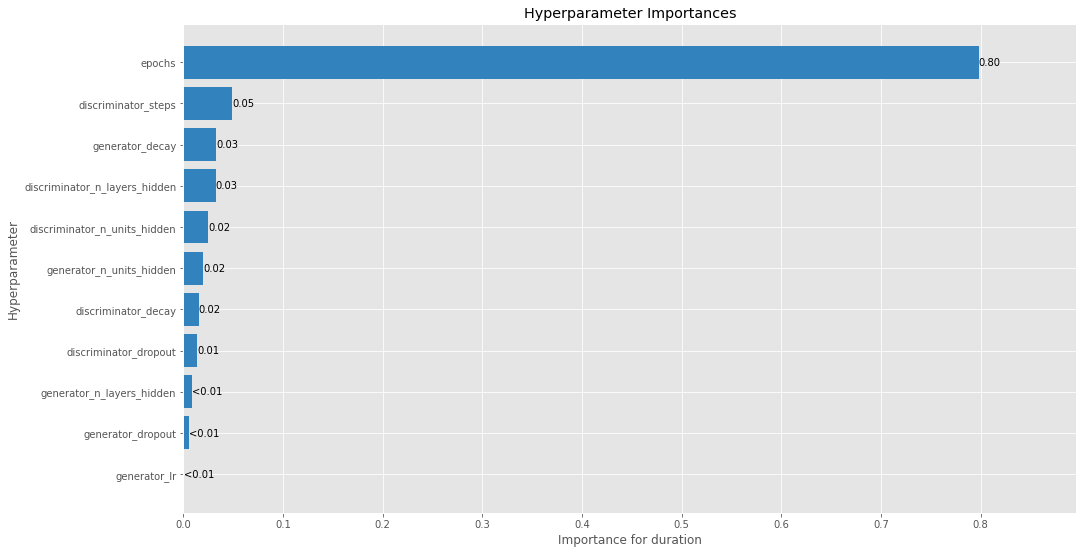

In [27]:
# Learn which hyperparameters are affecting the trial duration
plot_param_importances(study, target=lambda t: t.duration.total_seconds(), target_name="duration").figure.set_size_inches(16, 9)

/tmp/ipykernel_1186193/1077504765.py:2: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  plot_parallel_coordinate(study).figure.set_size_inches(16, 9)


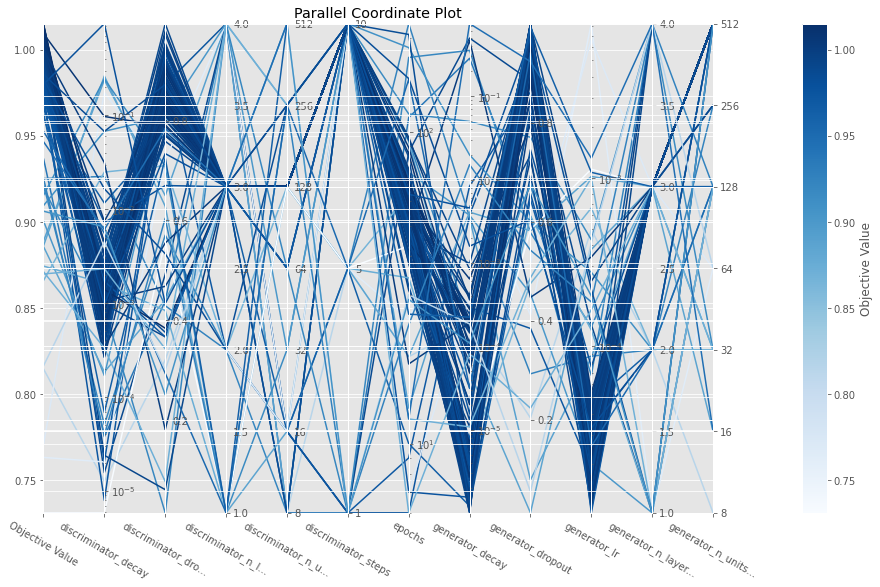

In [28]:
# Visualize high-dimensional hyperparameter relationships
plot_parallel_coordinate(study).figure.set_size_inches(16, 9)

/tmp/ipykernel_1186193/553887598.py:2: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  _ = plot_contour(study) # params=[..., ...]
[W 2024-06-05 15:39:57,321] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


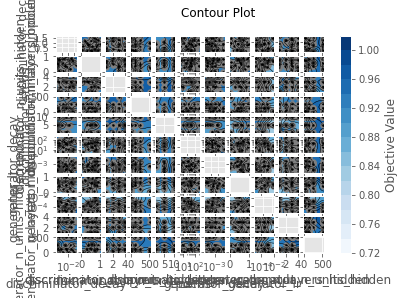

In [29]:
# Visualize high-dimensional hyperparameter relationships
_ = plot_contour(study) # params=[..., ...]

/tmp/ipykernel_1186193/3450741299.py:2: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  _ = plot_slice(study)


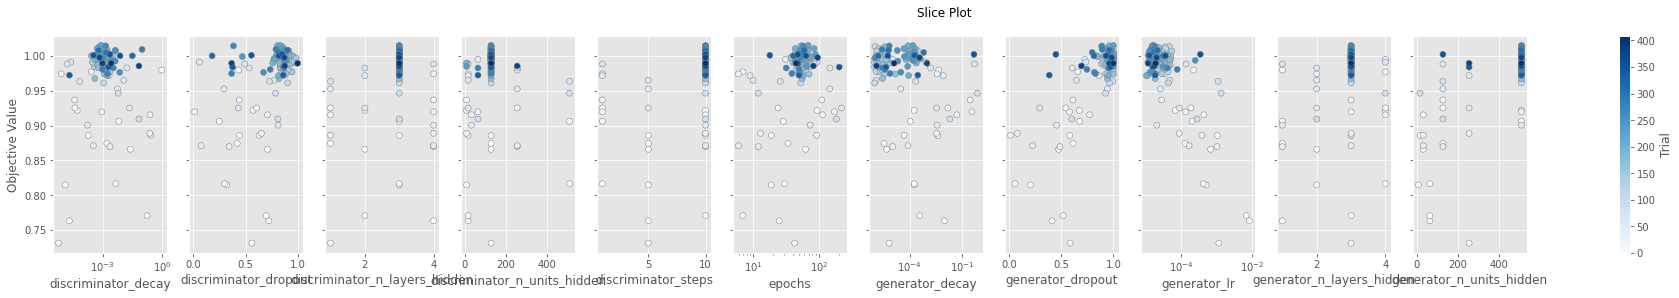

In [30]:
# Visualize individual hyperparameters as slice plot
_ = plot_slice(study)

**Performance with different sample size**

Results after running hyperparam_eval.py (performance of top 3 trials tuned for n=500 in n=50 and n=5000) and writing output to logs/ folder

In [21]:
file_path = f'logs/hyperparam_eval_{model_class.lower()}_output.txt'
with open(file_path, 'r') as file:
    file_contents = file.read()
    print(file_contents)
    file.close()

[Trial 0, n=50, seed=8506] CV fidelity_syn: 0.568 (std: 0.031, copy: 0.0%) - CV fidelity_gt_sample: 0.612 (std: 0.024, copy: 0.0%) - CV fidelity_bootstrap: 0.599 (std: 0.069, copy: 100.0%)
[Trial 0, n=50, seed=6369] CV fidelity_syn: 0.556 (std: 0.073, copy: 0.0%) - CV fidelity_gt_sample: 0.563 (std: 0.057, copy: 0.0%) - CV fidelity_bootstrap: 0.558 (std: 0.085, copy: 100.0%)
[Trial 0, n=50, seed=5111] CV fidelity_syn: 0.545 (std: 0.081, copy: 0.0%) - CV fidelity_gt_sample: 0.598 (std: 0.060, copy: 0.0%) - CV fidelity_bootstrap: 0.615 (std: 0.075, copy: 100.0%)
[Trial 0, n=50, seed=2698] CV fidelity_syn: 0.554 (std: 0.074, copy: 0.0%) - CV fidelity_gt_sample: 0.574 (std: 0.080, copy: 0.0%) - CV fidelity_bootstrap: 0.621 (std: 0.010, copy: 100.0%)
[Trial 0, n=50, seed=3078] CV fidelity_syn: 0.556 (std: 0.061, copy: 0.0%) - CV fidelity_gt_sample: 0.619 (std: 0.019, copy: 0.0%) - CV fidelity_bootstrap: 0.570 (std: 0.062, copy: 100.0%)
--> [Trial 0, summary] normalized CV fidelity_syn: [0.9